# Machine learning on Iris dataset

### Random Forest Classifier

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Optional: visualize the data
# sns.pairplot(df, hue="species")
# plt.show()

# Split the dataset
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




Grid Search CV results (sorted):
                                                          params  mean_test_score  std_test_score
    {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 50}         0.950000        0.061237
   {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}         0.950000        0.061237
    {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 50}         0.950000        0.061237
   {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}         0.950000        0.061237
   {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}         0.950000        0.061237
   {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 200}         0.950000        0.061237
   {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100}         0.950000        0.061237
    {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}         0.950000        0.061237
   {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}         0.950000   

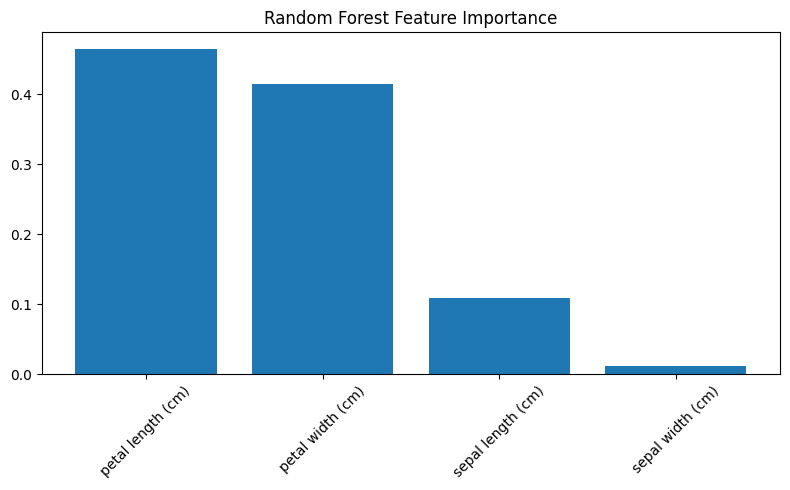

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Random Forest with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4, None],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid.fit(X_train, y_train)

# Show sorted GridSearch results
results = pd.DataFrame(grid.cv_results_)
results = results[['params', 'mean_test_score', 'std_test_score']]
results = results.sort_values(by='mean_test_score', ascending=False)
print("\nGrid Search CV results (sorted):")
print(results.to_string(index=False))

# Best parameters and model
print(f"\nBest Parameters: {grid.best_params_}")
best_rf = grid.best_estimator_

# Evaluate on test data
y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Plot feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Random Forest Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.tight_layout()
plt.show()

### Decision Tree Classifier


Grid Search CV results (sorted):
                                                           params  mean_test_score  std_test_score
      {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}         0.950000        0.061237
   {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}         0.950000        0.061237
     {'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}         0.941667        0.056519
  {'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}         0.941667        0.056519
   {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}         0.941667        0.062361
        {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}         0.941667        0.056519
     {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}         0.933333        0.056519
     {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}         0.933333        0.056519
     {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}         0

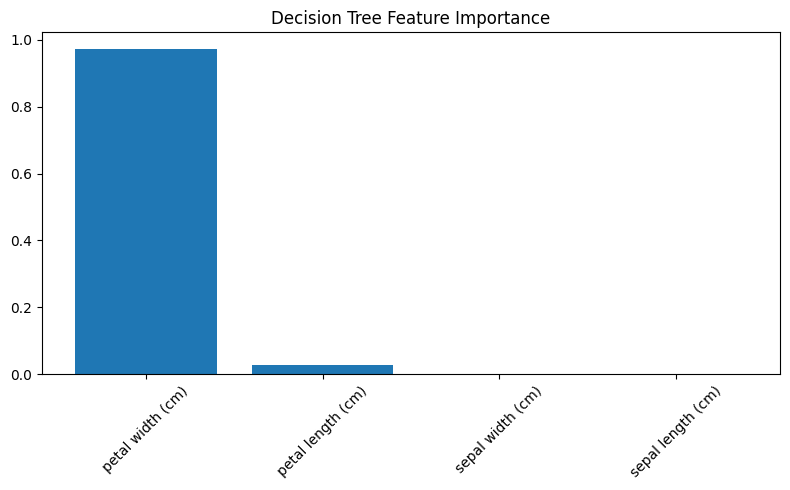

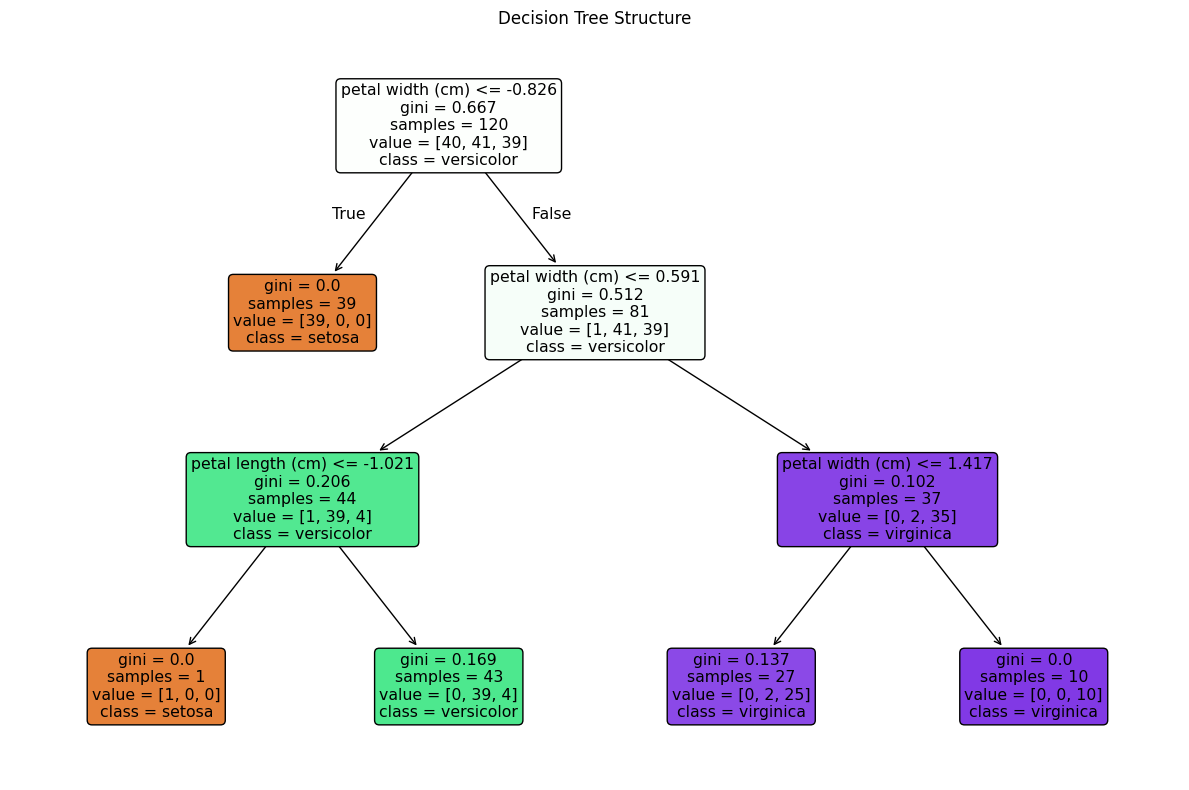

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Standardize features (optional for tree-based models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Decision Tree with GridSearchCV
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Show sorted GridSearch results
results = pd.DataFrame(grid.cv_results_)
results = results[['params', 'mean_test_score', 'std_test_score']]
results = results.sort_values(by='mean_test_score', ascending=False)
print("\nGrid Search CV results (sorted):")
print(results.to_string(index=False))

# Best model and evaluation
print(f"\nBest Parameters: {grid.best_params_}")
best_dt = grid.best_estimator_
y_pred = best_dt.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot feature importances
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Decision Tree Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.tight_layout()
plt.show()

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.tight_layout()
plt.show()

### K Neighbors Classifier

Best k: 3 with cross-validation accuracy: 0.9500


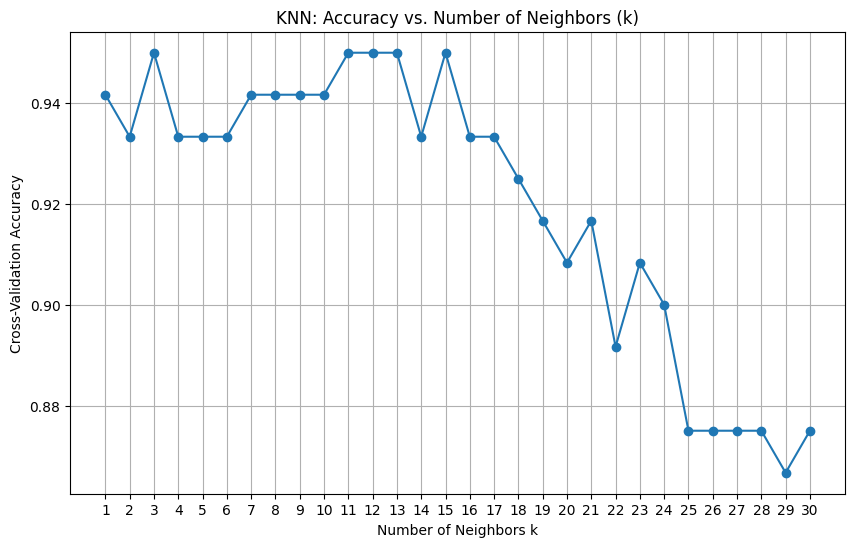

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test for final evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Try k from 1 to 30
k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 5-fold cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find best k
best_k = k_range[np.argmax(cv_scores)]
print(f"Best k: {best_k} with cross-validation accuracy: {max(cv_scores):.4f}")

# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o')
plt.title('KNN: Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Train final model with best_k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

### Support Vector Machine


Grid Search CV results (sorted):
                                          params  mean_test_score  std_test_score
 {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}         0.958333        0.064550
  {'C': 10, 'gamma': 'auto', 'kernel': 'linear'}         0.958333        0.064550
     {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}         0.950000        0.061237
 {'C': 100, 'gamma': 'auto', 'kernel': 'linear'}         0.950000        0.061237
{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}         0.950000        0.061237
      {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}         0.950000        0.061237
   {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}         0.950000        0.061237
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}         0.950000        0.040825
  {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}         0.950000        0.061237
 {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}         0.950000        0.040825
   {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}         0.94166

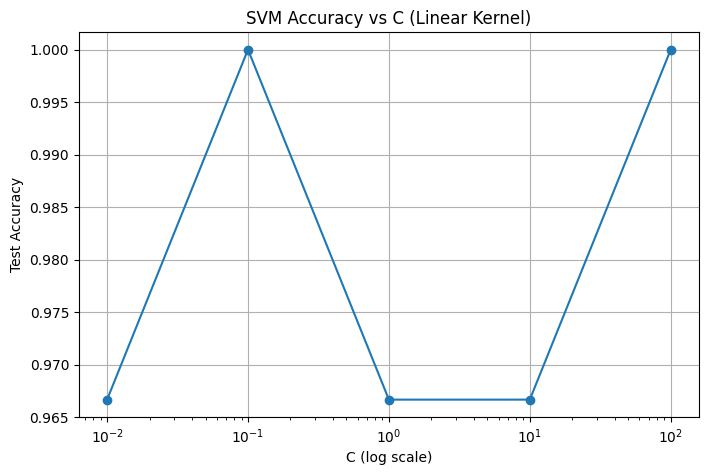

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# SVM with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

results = pd.DataFrame(grid.cv_results_)
results = results[['params', 'mean_test_score', 'std_test_score']]
results = results.sort_values(by='mean_test_score', ascending=False)
print("\nGrid Search CV results (sorted):")
print(results.to_string(index=False))

# Print all validation scores from CV
print("\nGrid Search CV results:")
for mean_score, params in zip(grid.cv_results_['mean_test_score'], grid.cv_results_['params']):
    print(f"{params}: {mean_score:.4f}")

# Best parameters and model
print(f"Best Parameters: {grid.best_params_}")
best_svm = grid.best_estimator_

# Evaluate on test data
y_pred = best_svm.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

for c in C_values:
    svm = SVC(kernel='linear', C=c)
    svm.fit(X_train, y_train)
    acc = svm.score(X_test, y_test)
    accuracies.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Test Accuracy')
plt.title('SVM Accuracy vs C (Linear Kernel)')
plt.grid(True)
plt.show()

### Logistic Regression


Grid Search CV results (sorted):
                                          params  mean_test_score  std_test_score
   {'C': 1, 'max_iter': 1000, 'solver': 'lbfgs'}         0.958333        0.045644
    {'C': 1, 'max_iter': 1000, 'solver': 'saga'}         0.958333        0.045644
  {'C': 10, 'max_iter': 1000, 'solver': 'lbfgs'}         0.958333        0.064550
   {'C': 10, 'max_iter': 1000, 'solver': 'saga'}         0.958333        0.064550
 {'C': 100, 'max_iter': 1000, 'solver': 'lbfgs'}         0.950000        0.061237
  {'C': 100, 'max_iter': 1000, 'solver': 'saga'}         0.950000        0.061237
 {'C': 0.1, 'max_iter': 1000, 'solver': 'lbfgs'}         0.900000        0.077280
  {'C': 0.1, 'max_iter': 1000, 'solver': 'saga'}         0.900000        0.077280
{'C': 0.01, 'max_iter': 1000, 'solver': 'lbfgs'}         0.850000        0.056519
 {'C': 0.01, 'max_iter': 1000, 'solver': 'saga'}         0.850000        0.056519

Best Parameters: {'C': 1, 'max_iter': 1000, 'solver': 'lbfgs'}


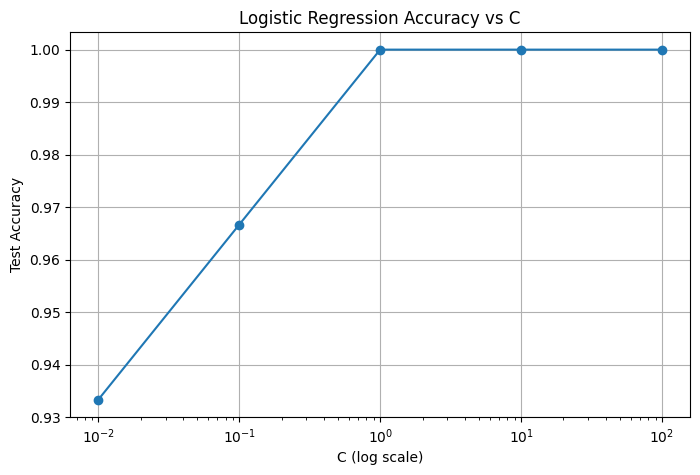

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Logistic Regression with GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [1000]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Show GridSearch results
results = pd.DataFrame(grid.cv_results_)
results = results[['params', 'mean_test_score', 'std_test_score']]
results = results.sort_values(by='mean_test_score', ascending=False)
print("\nGrid Search CV results (sorted):")
print(results.to_string(index=False))

print(f"\nBest Parameters: {grid.best_params_}")
best_lr = grid.best_estimator_

# Evaluate on test data
y_pred = best_lr.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


# Plot accuracy vs C for a fixed solver
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []
for c in C_values:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=1000)
    lr.fit(X_train, y_train)
    accuracies.append(lr.score(X_test, y_test))

plt.figure(figsize=(8, 5))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Test Accuracy')
plt.title('Logistic Regression Accuracy vs C')
plt.grid(True)
plt.show()

### Gradient Boosting Classifier


Grid Search CV results (sorted):
                                                      params  mean_test_score  std_test_score
 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}         0.950000        0.066667
{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200}         0.950000        0.061237
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}         0.950000        0.061237
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}         0.950000        0.061237
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}         0.950000        0.061237
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}         0.950000        0.061237
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}         0.950000        0.061237
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}         0.950000        0.061237
{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}         0.950000        0.061237
  {'learning_rate': 0.1, '

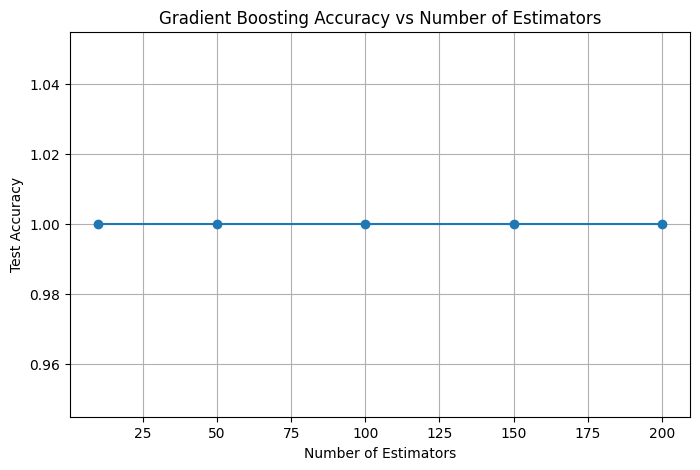

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize features (optional but can help)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Gradient Boosting with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4]
}

grid = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Show GridSearch results
results = pd.DataFrame(grid.cv_results_)
results = results[['params', 'mean_test_score', 'std_test_score']]
results = results.sort_values(by='mean_test_score', ascending=False)
print("\nGrid Search CV results (sorted):")
print(results.to_string(index=False))

print(f"\nBest Parameters: {grid.best_params_}")
best_gb = grid.best_estimator_

# Evaluate on test data
y_pred = best_gb.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Optional: Plot accuracy vs n_estimators for the best learning_rate and max_depth
n_estimators_range = [10, 50, 100, 150, 200]
accuracies = []
for n in n_estimators_range:
    gb = GradientBoostingClassifier(
        n_estimators=n,
        learning_rate=grid.best_params_['learning_rate'],
        max_depth=grid.best_params_['max_depth'],
        random_state=42
    )
    gb.fit(X_train, y_train)
    accuracies.append(gb.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.title('Gradient Boosting Accuracy vs Number of Estimators')
plt.grid(True)
plt.show()

### XGB Classifier


Grid Search CV results (sorted):
                                                      params  mean_test_score  std_test_score
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}         0.958333        0.064550
{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200}         0.950000        0.061237
 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}         0.950000        0.080795
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}         0.950000        0.080795
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}         0.950000        0.080795
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}         0.950000        0.061237
  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}         0.950000        0.061237
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}         0.941667        0.056519
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}         0.941667        0.056519
  {'learning_rate': 0.2, '

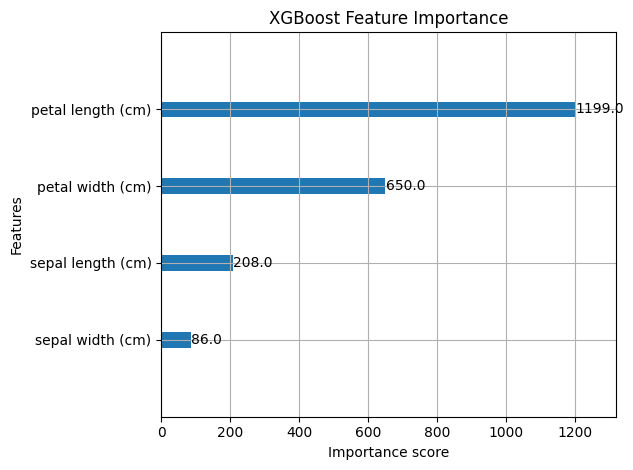

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier, plot_importance

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# XGBoost hyperparameter grid (clean version)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.2]
}

# GridSearchCV setup (with proper evaluation metric)
grid = GridSearchCV(
    XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', verbosity=0),
    param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit the model
grid.fit(X_train, y_train)

# GridSearch results
results = pd.DataFrame(grid.cv_results_)
results = results[['params', 'mean_test_score', 'std_test_score']]
results = results.sort_values(by='mean_test_score', ascending=False)

print("\nGrid Search CV results (sorted):")
print(results.to_string(index=False))

# Best model and evaluation
print(f"\nBest Parameters: {grid.best_params_}")
best_xgb = grid.best_estimator_

# Predict on test data
y_pred = best_xgb.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot feature importance with proper labels
booster = best_xgb.get_booster()
booster.feature_names = feature_names  # Assign feature names before plotting
plot_importance(booster)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()